In [5]:
pip install matplotlib-venn

     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 653.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45335 sha256=ff980d75bfc07aec15161b61030ca8d984a4f4eac24d054c48fd9f8cf74a1cbf
  Stored in directory: c:\users\18136\appdata\local\pip\cache\wheels\08\28\f0\0a3240d632a27df6da04d2888a6b058c37e1cbbb425ec5d2cc
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib_venn import venn3

import openpyxl

In [5]:
# Load the Excel file (replace with your actual file path)
df_sars = pd.read_excel('SARS_CoV2+_vs_SARS_CoV2_EWAS.xlsx', engine='openpyxl')
df_taste_up = pd.read_excel('Taste_organoids_genes.xlsx', engine='openpyxl')
df_taste_down = pd.read_excel('Down_regulated_taste_organoids.xlsx', engine='openpyxl')
df_sars_resp = pd.read_excel('SARS_CoV2+_vs_other_upper_respiratory_infection.xlsx', engine='openpyxl')


# Extract column K which corresponds to the 'gene' column in your image
sars_genes = df_sars.iloc[1:, 10].dropna()  # Column K is the 11th column (index 10)
taste_up_genes = df_taste_up.iloc[:, 0].dropna()
taste_down_genes = df_taste_down.iloc[:, 0].dropna()
sars_resp_genes = df_sars_resp.iloc[1:, 10].dropna()


In [6]:
sars_tasteup_inter = set([x.lower() for x in sars_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_up_genes if type(x) == str))

sars_tastedown_inter = set([x.lower() for x in sars_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_down_genes if type(x) == str))

sarsresp_tasteup_inter = set([x.lower() for x in sars_resp_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_up_genes if type(x) == str))

sarsresp_tastedown_inter = set([x.lower() for x in sars_resp_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_down_genes if type(x) == str))

In [10]:
# Save the extracted gene list to a text file (including NaN values and duplicates)
with open('sars_tasteup.txt', 'w') as f:
    for gene in sars_tasteup_inter:
        f.write(f"{gene.upper()}\n")

with open('sars_tastedown.txt', 'w') as f:
    for gene in sars_tastedown_inter:
        f.write(f"{gene}\n")
        
with open('sars_resp_tasteup.txt', 'w') as f:
    for gene in sarsresp_tasteup_inter:
        f.write(f"{gene.upper()}\n")
        
with open('sars_resp_tastedown.txt', 'w') as f:
    for gene in sarsresp_tastedown_inter:
        f.write(f"{gene}\n")

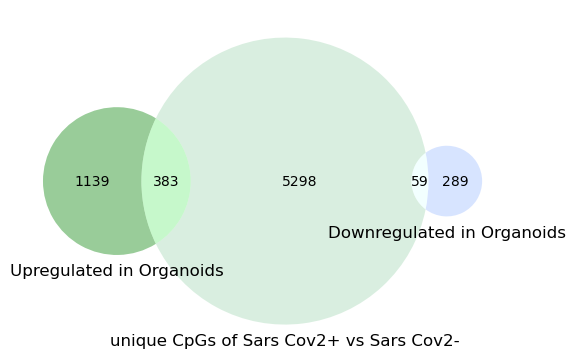

In [14]:
venn3([set([x.lower() for x in sars_genes if type(x) == str]), \
     set(x.lower() for x in taste_up_genes if type(x) == str),
     set(x.lower() for x in taste_down_genes if type(x) == str)], set_labels=('unique CpGs of Sars Cov2+ vs Sars Cov2-',\
        'Upregulated in Organoids', 'Downregulated in Organoids'), set_colors=('#A1D6B2', 'green', '#9DBDFF'))
plt.show()

In [10]:
with open('unique_genes_5298.txt', 'w') as f:
    for gene in set([x.lower() for x in sars_genes if type(x) == str])-set(x.lower() for x in taste_up_genes if type(x) == str)-set(x.lower() for x in taste_down_genes if type(x) == str):
        f.write(f"{gene}\n")


The Venn diagram illustrates a comparison between genes related to taste regulation and those affected by SARS-CoV-2 infection. The green circle on the left represents taste up-regulated genes, containing 1,139 unique genes, with 383 genes shared between this set and the SARS-CoV-2 set. The blue circle on the right represents taste down-regulated genes, comprising 289 unique genes, with 59 genes overlapping with the SARS-CoV-2 set. The large, pale green circle represents genes affected by the comparison of SARS-CoV-2 positive (Sars Cov2+) versus SARS-CoV-2 negative (Sars Cov2-) samples, containing 5,298 unique genes. The overlaps in the diagram show the genes that are common between taste regulation (both up-regulated and down-regulated) and SARS-CoV-2 infection, highlighting how the virus potentially affects gene expression related to taste function.

In [ ]:
sars_tasteup_inter = set([x.lower() for x in sars_resp_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_up_genes if type(x) == str))

sars_tastedown_inter = set([x.lower() for x in sars_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_down_genes if type(x) == str))

sarsresp_tasteup_inter = set([x.lower() for x in sars_resp_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_up_genes if type(x) == str))

sarsresp_tastedown_inter = set([x.lower() for x in sars_resp_genes if type(x) == str]).intersection(\
     set(x.lower() for x in taste_down_genes if type(x) == str))

In [18]:
len(sarsresp_tasteup_inter)

62

In [19]:
len(sarsresp_tastedown_inter)

7

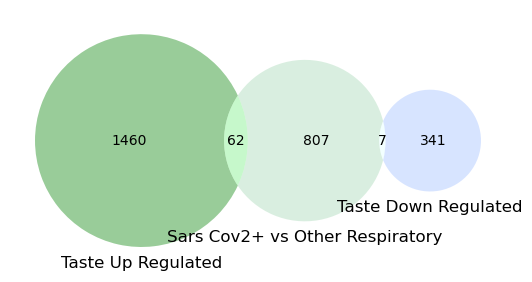

In [90]:
venn3([set([x.lower() for x in sars_resp_genes if type(x) == str]), \
     set(x.lower() for x in taste_up_genes if type(x) == str),
     set(x.lower() for x in taste_down_genes if type(x) == str)], set_labels=('Sars Cov2+ vs Other Respiratory',\
        'Taste Up Regulated', 'Taste Down Regulated'), set_colors=('#A1D6B2', 'green', '#9DBDFF'))
plt.show()

In [15]:
with open('unique_genes_807.txt', 'w') as f:
    for gene in set([x.lower() for x in sars_resp_genes if type(x) == str])-set(x.lower() for x in taste_up_genes if type(x) == str)-set(x.lower() for x in taste_down_genes if type(x) == str):
        f.write(f"{gene}\n")

The Venn diagram compares the expression of genes involved in taste regulation and those affected by SARS-CoV-2 infection versus other respiratory infections. The green circle on the left represents taste up-regulated genes, containing 1,460 unique genes, with 62 genes overlapping with the SARS-CoV-2 and other respiratory gene set. The blue circle on the right depicts taste down-regulated genes, which contains 341 unique genes, and has a small overlap of 7 genes with the SARS-CoV-2 set. The larger light green circle in the middle represents genes differentially expressed in the comparison between SARS-CoV-2 positive (Sars Cov2+) and other respiratory infections, containing 807 unique genes. The overlaps illustrate the number of shared genes between these sets, indicating which genes are commonly affected by both SARS-CoV-2 and other respiratory conditions in relation to taste regulation.